In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import os

### QPC decay

In [112]:
decay30 = pd.read_csv('/home/nefta/thesis/results/qpc/conductance/vbg=0.2-20180222-18:02:40/data.csv',
                      delimiter=' ', header=None).iloc[0].values[20:]
decay15 = pd.read_csv('/home/nefta/thesis/results/qpc/conductance/vbg=0.2-20180222-18:05:21/data.csv', 
                      delimiter=' ', header=None).iloc[0].values[20:]
vsg_values = np.linspace(-1, 0.2, 100)[20:]

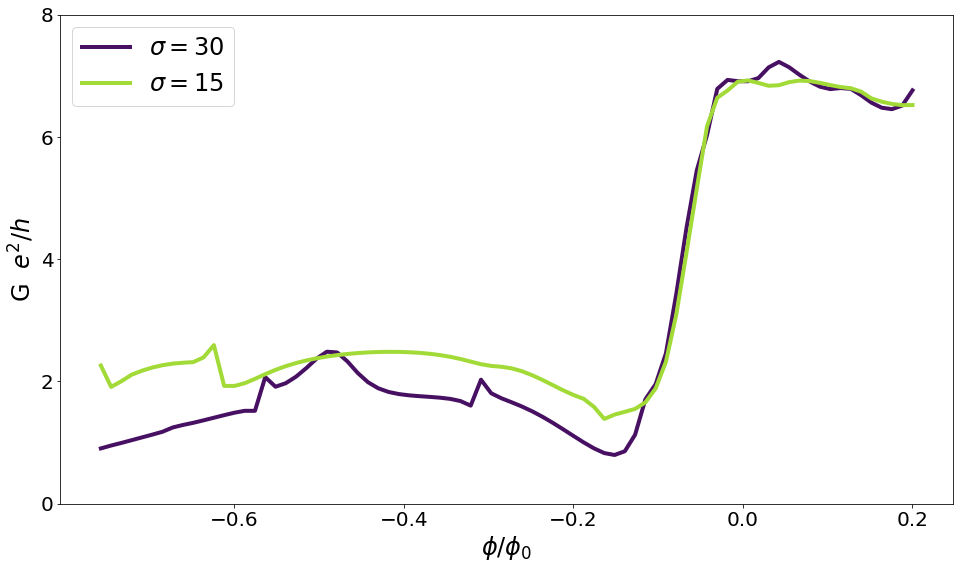

In [127]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(vsg_values, decay30, label=r'$\sigma = {}$'.format(30), color=cmap(10), linewidth=4)
ax.plot(vsg_values, decay15, label=r'$\sigma = {}$'.format(15), color=cmap(220), linewidth=4)
ax.legend(prop={'size': 18})

ax.xaxis.set_ticks(np.arange(-0.6, 0.4, 0.2))
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_ticks(np.arange(0, 10, 2))
ax.yaxis.set_tick_params(labelsize=ticklabelsize)
ax.set_xlabel(r'$\phi / \phi_0$', fontsize=fontlabelsize)
ax.set_ylabel(r'G  $e^2/h$', fontsize=fontlabelsize)
ax.legend(prop={'size':24})
fig.savefig('conductance-sigma.eps')

### QPC with rough edges

In [86]:
qpc_rough_data = ['/home/nefta/thesis/results/qpc/supercurrent/rough/depth=5size=0.5-20180222-12:02:59/', 
                 '/home/nefta/thesis/results/qpc/supercurrent/rough/depth=10size=0.5-20180222-10:31:20/',
                 '/home/nefta/thesis/results/qpc/supercurrent/rough/depth=15size=0.5-20180222-12:19:21/',
                 '/home/nefta/thesis/results/qpc/supercurrent/rough/depth=20size=0.5-20180222-10:47:57/',
                 '/home/nefta/thesis/results/qpc/supercurrent/rough/depth=25size=0.5-20180222-12:35:53/',
                 '/home/nefta/thesis/results/qpc/supercurrent/rough/depth=30size=0.5-20180222-11:04:31/',
                 '/home/nefta/thesis/results/qpc/supercurrent/rough/depth=35size=0.5-20180222-12:52:19/',
                 '/home/nefta/thesis/results/qpc/supercurrent/rough/depth=40size=0.5-20180222-11:21:07/',
                 '/home/nefta/thesis/results/qpc/supercurrent/rough/depth=50size=0.5-20180222-11:37:46/']

In [87]:
depth = [5, 10, 15, 20, 25, 30, 35, 40, 50]
#depth = [5, 15, 25, 35,  50]

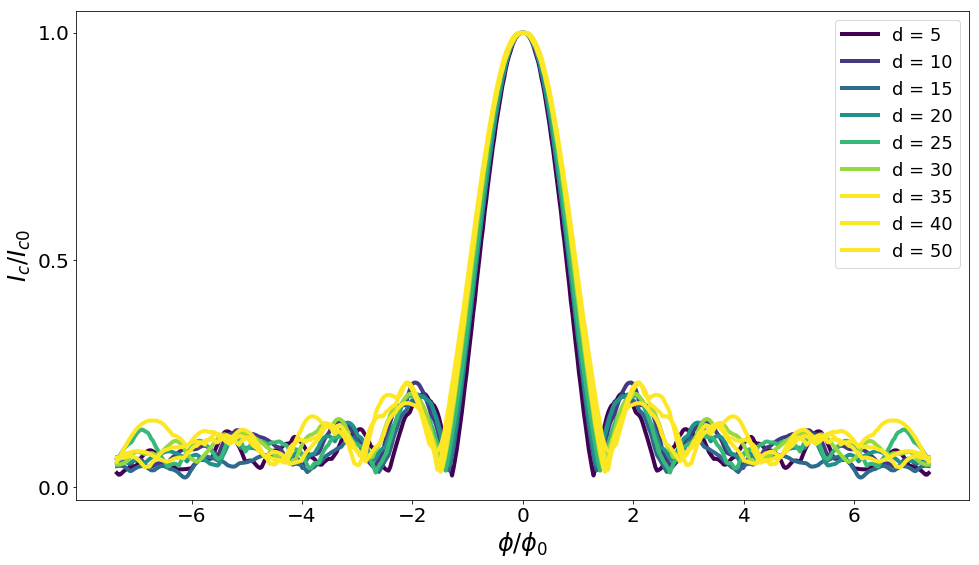

In [89]:
fig, ax = plt.subplots(figsize=(16, 9))
maxB = 5e-05
bvalues = np.linspace(-maxB, maxB, 500)
fluxvalues = bvalues * 700 * 210
colordelta = round(cmap.N / len(hb_upper_data))
for index, (datafile, vsg) in enumerate(zip(qpc_rough_data, depth)):
    data = pd.read_csv(datafile + 'data.csv', delimiter=' ', header=None)[0].values
    ic_zero = np.amax(data)
    ax.plot(fluxvalues, data / ic_zero, color=cmap(index*colordelta), linewidth=4,
           label=r'd = {}'.format(vsg))
ax.xaxis.set_ticks(np.arange(-6, 7, 2))
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_ticks([1, 0.5, 0])
ax.yaxis.set_tick_params(labelsize=ticklabelsize)
ax.set_xlabel(r'$\phi / \phi_0$', fontsize=fontlabelsize)
ax.set_ylabel(r'$I_c / I_{c0}$', fontsize=fontlabelsize)
ax.legend(prop={'size':18})

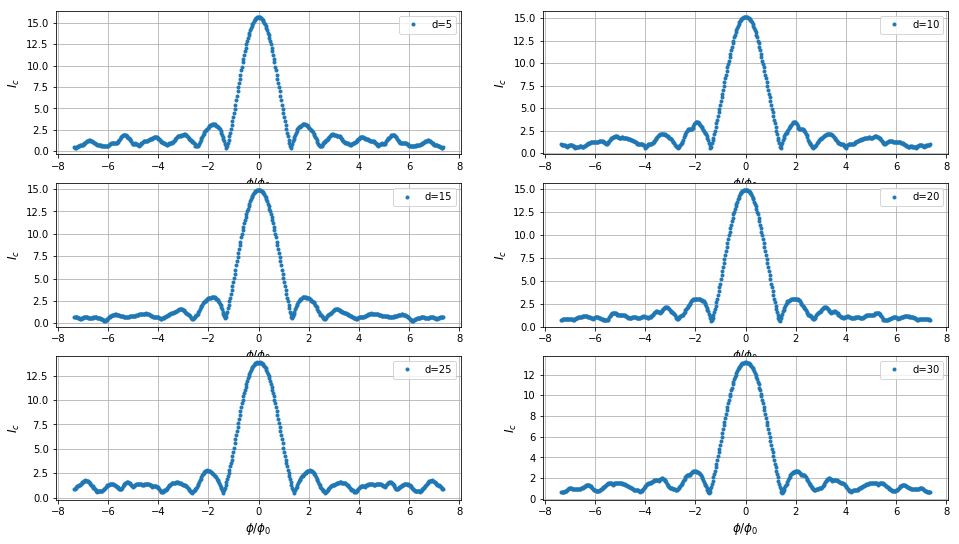

In [93]:
fig = plt.figure(figsize=(16, 9))
for i, label in enumerate(('a', 'b', 'c', 'd', 'e', 'f',)):
    n = 321 + i
    ax = fig.add_subplot(n)
    current_values = pd.read_csv(qpc_rough_data[i] + 'data.csv', delimiter=' ', header=None)[0].values
    ax.plot(fluxvalues, current_values, linestyle='None',
             marker='.', label='d={}'.format(depth[i]))
    ax.grid()
    ax.legend(loc=1)
    ax.set_xlabel(r'$\phi / \phi_0$', fontsize=12)
    ax.set_ylabel(r'$I_c$', fontsize=12)
    ax.ticklabel_format(style='sci')

### Half Barrier data

In [129]:
hb_upper_data = ['/home/nefta/thesis/results/hb_upper/supercurrent/vsg=-0.1-20171120-11:24:23/',
                '/home/nefta/thesis/results/hb_upper/supercurrent/vsg=-0.2-20171120-11:32:14/',
                '/home/nefta/thesis/results/hb_upper/supercurrent/vsg=-0.3-20171120-11:36:00/',
                '/home/nefta/thesis/results/hb_upper/supercurrent/vsg=-0.4-20171120-11:44:14/',
                '/home/nefta/thesis/results/hb_upper/supercurrent/vsg=-0.5-20171120-11:52:32/',
                '/home/nefta/thesis/results/hb_upper/supercurrent/vsg=-0.6-20171120-12:00:40/']

vsg_values = [-0.1, -0.2, -0.3, -0.4, -0.5, -0.6]

In [136]:
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=1)
fontlabelsize = 26
ticklabelsize = 22

In [30]:
round(cmap.N / len(hb_upper_data))

43

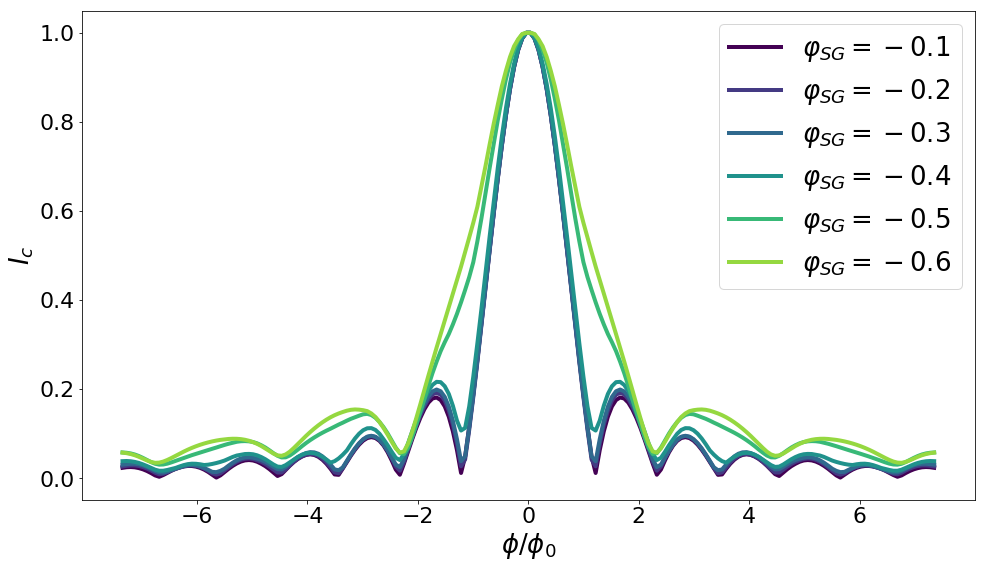

In [138]:
fig, ax = plt.subplots(figsize=(16, 9))
maxB = 5e-05
bvalues = np.linspace(-maxB, maxB, 200)
fluxvalues = bvalues * 700 * 210
colordelta = round(cmap.N / len(hb_upper_data))
for index, (datafile, vsg) in enumerate(zip(hb_upper_data, vsg_values)):
    data = pd.read_csv(datafile + 'data.csv', header=None)[0].values
    ic_zero = np.amax(data)
    ax.plot(fluxvalues, data / ic_zero, color=cmap(index*colordelta), linewidth=4,
           label=r'$\varphi_{{SG}} = {}$'.format(vsg))
    #ax.plot(fluxvalues, data, color=cmap(index*colordelta), linewidth=4,
    #       label=r'$\varphi_{{SG}} = {}$'.format(vsg))

ax.xaxis.set_ticks(np.arange(-6, 7, 2))
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
#ax.yaxis.set_ticks([1, 0.5, 0])
ax.yaxis.set_tick_params(labelsize=ticklabelsize)
ax.set_xlabel(r'$\phi / \phi_0$', fontsize=fontlabelsize)
ax.set_ylabel(r'$I_c $', fontsize=fontlabelsize)
ax.legend(prop={'size':26})
#fig.savefig('hb_upper.eps')

In [37]:
hb_lower_data = ['/home/nefta/thesis/results/hb_lower/supercurrent/vsg=-0.1-20171120-11:44:30/',
                '/home/nefta/thesis/results/hb_lower/supercurrent/vsg=-0.2-20171120-11:52:18/',
                '/home/nefta/thesis/results/hb_lower/supercurrent/vsg=-0.3-20171120-12:00:06/',
                '/home/nefta/thesis/results/hb_lower/supercurrent/vsg=-0.4-20171120-12:08:00/',
                '/home/nefta/thesis/results/hb_lower/supercurrent/vsg=-0.5-20171120-12:15:49/', 
                '/home/nefta/thesis/results/hb_lower/supercurrent/vsg=-0.6-20171120-12:23:45/']


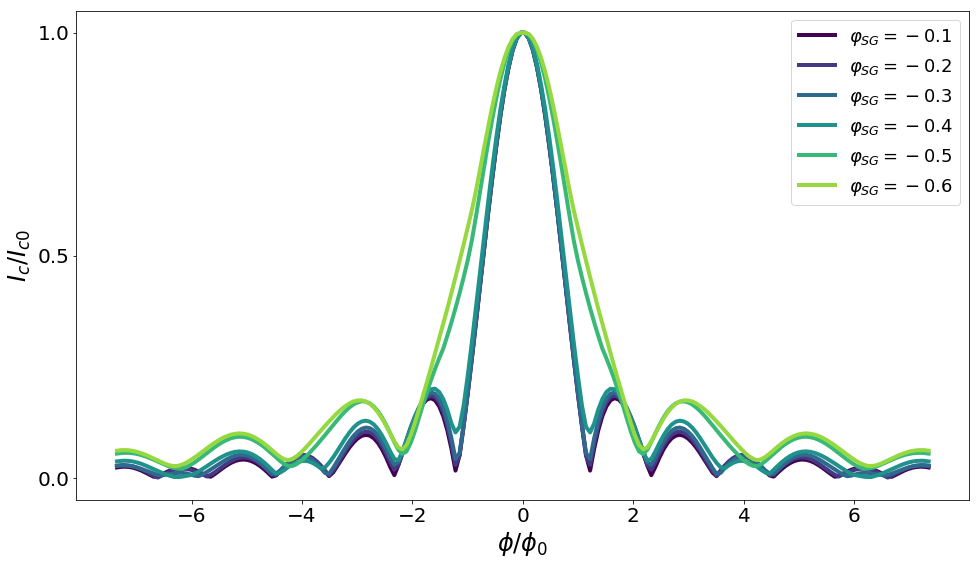

In [59]:
fig, ax = plt.subplots(figsize=(16, 9))

for index, (datafile, vsg) in enumerate(zip(hb_lower_data, vsg_values)):
    colordelta = round(cmap.N / len(hb_lower_data))    
    data = pd.read_csv(datafile + 'data.csv', header=None)[0].values
    ic_zero = np.amax(data)
    #ax.plot(data / ic_zero)    
    ax.plot(fluxvalues, data / ic_zero, color=cmap(index*colordelta), linewidth=4,
           label=r'$\varphi_{{SG}} = {}$'.format(vsg))
    
ax.xaxis.set_ticks(np.arange(-6, 7, 2))
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_ticks([1,0.5, 0])
ax.yaxis.set_tick_params(labelsize=ticklabelsize)
ax.set_xlabel(r'$\phi / \phi_0$', fontsize=fontlabelsize)
ax.set_ylabel(r'$I_c / I_{c0}$', fontsize=fontlabelsize)
ax.legend(prop={'size':18})
#fig.savefig('hb_lower.eps')

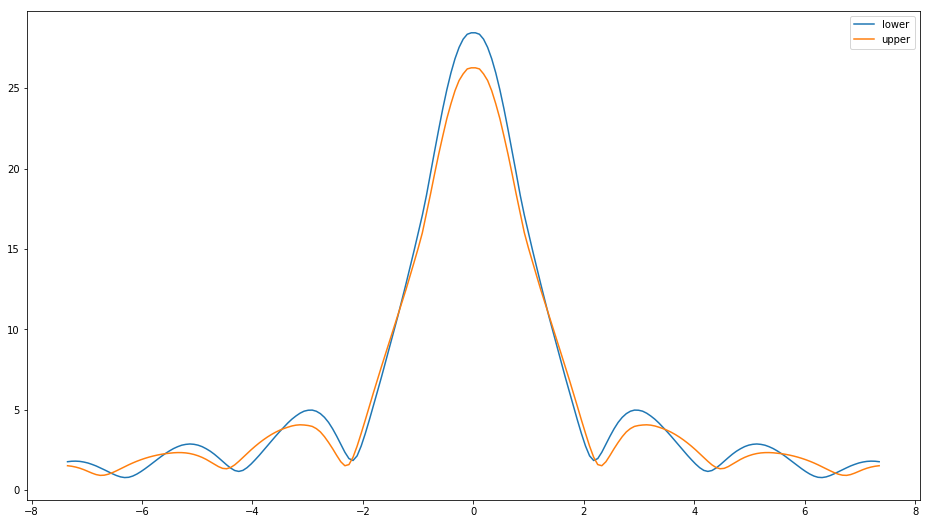

In [61]:
fig, ax = plt.subplots(figsize=(16,9))

data_low = pd.read_csv(hb_lower_data[-1] + 'data.csv', header=None)[0].values
data_up = pd.read_csv(hb_upper_data[-1] + 'data.csv',  header=None)[0].values

ax.plot(fluxvalues, data_low, label='lower')
ax.plot(fluxvalues, data_up, label='upper')
ax.legend()